# CALGARY AIR QUALITY DATA ANALYSIS

## .I. Introduction
 Air quality refers to the level of particulate matter present in the air, as well as a general degree of cleanliness. Human health, ecosystems and quality of life are directly affected by this crucial element in the environment. For the assessment of possible risks related to pollutants and for the application of effective measures aimed at mitigating their negative impacts, monitoring and awareness of air quality are necessary.
 
Valuable information on the state of the atmosphere can be obtained from measuring and analysing air quality parameters, including concentrations of different pollutants, meteorological conditions as well as atmospheric characteristics. We can establish sources of air pollution, evaluate the efficiency of strategies for controlling emissions and make sound decisions on protecting human health and the environment when we keep an eye on air quality.

 The objective of the project is to determine which pollutants and atmospheric characteristics contribute to the increase in the air quality health index and to forecast the outdoor temperature for the next 15 days from today.(14th June 2023).

Note: All the converted csv files in this file were used for statistical analysis using RStudio. They are commented in the code snippets.

## .II. Dataset

Air Quality Dataset was collected from Open Calgary website. This dataset consists of 12 columns and 611242 rows. 
The dataset covers information collected from 3 stations of Calgary, namely, Southeast, Central Inglewood, and Varsity
It contains data from 2021 to 2023.

###### .II.1. Importing libraries

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

###### .II.2. Reading the csv file and converting it to a dataframe

In [3]:
air_quality_data = pd.read_csv('Air_Quality_Data.csv')
air_quality_data = pd.DataFrame(air_quality_data)

In [4]:
air_quality_data.head()

Unnamed: 0          ReadingDate               Station Name  \
0           0  2023-05-31 00:00:00  Calgary Central Inglewood   
1           1  2023-05-31 00:00:00  Calgary Central Inglewood   
2           2  2023-05-31 00:00:00          Calgary Southeast   
3           3  2023-05-11 00:00:00  Calgary Central Inglewood   
4           4  2023-05-11 00:00:00  Calgary Central Inglewood   

                  Parameter   Value   Latitude   Longitude  \
0  Air Quality Health Index   4.000  51.030789 -114.008836   
1           Carbon Monoxide   0.290  51.030789 -114.008836   
2                     Ozone   0.031  50.955122 -113.969742   
3   Fine Particulate Matter  12.500  51.030789 -114.008836   
4                   Methane   2.600  51.030789 -114.008836   

                           Point  Day  Month  Year  Hours  
0  POINT (-114.008836 51.030789)   31      5  2023      0  
1  POINT (-114.008836 51.030789)   31      5  2023      0  
2  POINT (-113.969742 50.955122)   31      5  2023      0  
3  POINT (-114.008836 51.030789)   11      5  2023      0  
4  POINT (-114.008836 51.030789)   11      5  2023      0

## .III. Data Cleaning
###### .III.1. Selecting the columns needed for this project

In [5]:
air_quality_data = air_quality_data[['ReadingDate', 'Station Name', 'Parameter', 'Value', 'Latitude', 'Longitude', 'Point']]
air_quality_data.head()

ReadingDate               Station Name                 Parameter  \
0  2023-05-31 00:00:00  Calgary Central Inglewood  Air Quality Health Index   
1  2023-05-31 00:00:00  Calgary Central Inglewood           Carbon Monoxide   
2  2023-05-31 00:00:00          Calgary Southeast                     Ozone   
3  2023-05-11 00:00:00  Calgary Central Inglewood   Fine Particulate Matter   
4  2023-05-11 00:00:00  Calgary Central Inglewood                   Methane   

    Value   Latitude   Longitude                          Point  
0   4.000  51.030789 -114.008836  POINT (-114.008836 51.030789)  
1   0.290  51.030789 -114.008836  POINT (-114.008836 51.030789)  
2   0.031  50.955122 -113.969742  POINT (-113.969742 50.955122)  
3  12.500  51.030789 -114.008836  POINT (-114.008836 51.030789)  
4   2.600  51.030789 -114.008836  POINT (-114.008836 51.030789)

In [6]:
air_quality_data.dtypes

ReadingDate      object
Station Name     object
Parameter        object
Value           float64
Latitude        float64
Longitude       float64
Point            object
dtype: object

###### .III.2. Removing Null values from the dataframe

In [7]:
print(len(air_quality_data))
print(air_quality_data.isnull().sum())
air_quality_data = air_quality_data.dropna()
len(air_quality_data)

611242
ReadingDate     0
Station Name    0
Parameter       0
Value           0
Latitude        0
Longitude       0
Point           0
dtype: int64


611242

## .IV. Data Wrangling

###### .IV.1. Converting ReadingDate to datetime type

In [8]:
air_quality_data['ReadingDate'] = pd.to_datetime(air_quality_data['ReadingDate'])
air_quality_data.dtypes

ReadingDate     datetime64[ns]
Station Name            object
Parameter               object
Value                  float64
Latitude               float64
Longitude              float64
Point                   object
dtype: object

###### .IV.2. Extracting Year, Month, Day, and Hours from ReadingDate and changing their data types

In [9]:
air_quality_data['Day'] = air_quality_data['ReadingDate'].dt.day
air_quality_data['Month'] = air_quality_data['ReadingDate'].dt.month
air_quality_data['Year'] = air_quality_data['ReadingDate'].dt.year
air_quality_data['Hours'] = air_quality_data['ReadingDate'].dt.hour
air_quality_data['Day'] = air_quality_data['Day'].astype(int)
air_quality_data['Month'] = air_quality_data['Month'].astype(int)
air_quality_data['Year'] = air_quality_data['Year'].astype(int)
air_quality_data['Hours'] = air_quality_data['Hours'].astype(int)
air_quality_data.head()

ReadingDate               Station Name                 Parameter   Value  \
0  2023-05-31  Calgary Central Inglewood  Air Quality Health Index   4.000   
1  2023-05-31  Calgary Central Inglewood           Carbon Monoxide   0.290   
2  2023-05-31          Calgary Southeast                     Ozone   0.031   
3  2023-05-11  Calgary Central Inglewood   Fine Particulate Matter  12.500   
4  2023-05-11  Calgary Central Inglewood                   Methane   2.600   

    Latitude   Longitude                          Point  Day  Month  Year  \
0  51.030789 -114.008836  POINT (-114.008836 51.030789)   31      5  2023   
1  51.030789 -114.008836  POINT (-114.008836 51.030789)   31      5  2023   
2  50.955122 -113.969742  POINT (-113.969742 50.955122)   31      5  2023   
3  51.030789 -114.008836  POINT (-114.008836 51.030789)   11      5  2023   
4  51.030789 -114.008836  POINT (-114.008836 51.030789)   11      5  2023   

   Hours  
0      0  
1      0  
2      0  
3      0  
4      0

###### .IV.3. Sorting the dataframe by ReadingDate in descending order

In [10]:
# air_quality_data.to_csv('air_quality_data.csv')
air_quality_data = air_quality_data.sort_values(by = ['ReadingDate'], ascending = False)
air_quality_data.head()

ReadingDate               Station Name  \
10452 2023-06-05 17:00:00  Calgary Central Inglewood   
10389 2023-06-05 17:00:00          Calgary Southeast   
10563 2023-06-05 17:00:00            Calgary Varsity   
10251 2023-06-05 16:00:00          Calgary Southeast   
10284 2023-06-05 16:00:00            Calgary Varsity   

                      Parameter  Value   Latitude   Longitude  \
10452  Air Quality Health Index    4.0  51.030789 -114.008836   
10389  Air Quality Health Index    4.0  50.955122 -113.969742   
10563  Air Quality Health Index    5.0  51.082720 -114.138994   
10251                   Methane    2.0  50.955122 -113.969742   
10284       Outdoor Temperature   22.1  51.082720 -114.138994   

                               Point  Day  Month  Year  Hours  
10452  POINT (-114.008836 51.030789)    5      6  2023     17  
10389  POINT (-113.969742 50.955122)    5      6  2023     17  
10563   POINT (-114.138994 51.08272)    5      6  2023     17  
10251  POINT (-113.969742 50.955122)    5      6  2023     16  
10284   POINT (-114.138994 51.08272)    5      6  2023     16

###### .IV.4. Unstacking the dataframe based on Parameter

In [11]:
df = air_quality_data.reset_index().groupby(['ReadingDate', 'Year', 'Month', 'Day', 'Hours', 'Latitude', 'Longitude', 'Station Name', 'Parameter'])['Value'].aggregate('first').unstack()
df.tail()

Parameter                                                                                 Air Quality Health Index  \
ReadingDate         Year Month Day Hours Latitude  Longitude   Station Name                                          
2023-06-05 16:00:00 2023 6     5   16    51.030789 -114.008836 Calgary Central Inglewood                       4.0   
                                         51.082720 -114.138994 Calgary Varsity                                 4.0   
2023-06-05 17:00:00 2023 6     5   17    50.955122 -113.969742 Calgary Southeast                               4.0   
                                         51.030789 -114.008836 Calgary Central Inglewood                       4.0   
                                         51.082720 -114.138994 Calgary Varsity                                 5.0   

Parameter                                                                                 Carbon Monoxide  \
ReadingDate         Year Month Day Hours Latitude  Longitude   Station Name                                 
2023-06-05 16:00:00 2023 6     5   16    51.030789 -114.008836 Calgary Central Inglewood             0.20   
                                         51.082720 -114.138994 Calgary Varsity                       0.33   
2023-06-05 17:00:00 2023 6     5   17    50.955122 -113.969742 Calgary Southeast                      NaN   
                                         51.030789 -114.008836 Calgary Central Inglewood              NaN   
                                         51.082720 -114.138994 Calgary Varsity                        NaN   

Parameter                                                                                 Fine Particulate Matter  \
ReadingDate         Year Month Day Hours Latitude  Longitude   Station Name                                         
2023-06-05 16:00:00 2023 6     5   16    51.030789 -114.008836 Calgary Central Inglewood                     12.2   
                                         51.082720 -114.138994 Calgary Varsity                               19.1   
2023-06-05 17:00:00 2023 6     5   17    50.955122 -113.969742 Calgary Southeast                              NaN   
                                         51.030789 -114.008836 Calgary Central Inglewood                      NaN   
                                         51.082720 -114.138994 Calgary Varsity                                NaN   

Parameter                                                                                 Hydrogen Sulphide  \
ReadingDate         Year Month Day Hours Latitude  Longitude   Station Name                                   
2023-06-05 16:00:00 2023 6     5   16    51.030789 -114.008836 Calgary Central Inglewood                NaN   
                                         51.082720 -114.138994 Calgary Varsity                          NaN   
2023-06-05 17:00:00 2023 6     5   17    50.955122 -113.969742 Calgary Southeast                        NaN   
                                         51.030789 -114.008836 Calgary Central Inglewood                NaN   
                                         51.082720 -114.138994 Calgary Varsity                          NaN   

Parameter                                                                                 Inhalable Particulate Matter  \
ReadingDate         Year Month Day Hours Latitude  Longitude   Station Name                                              
2023-06-05 16:00:00 2023 6     5   16    51.030789 -114.008836 Calgary Central Inglewood                           NaN   
                                         51.082720 -114.138994 Calgary Varsity                                     NaN   
2023-06-05 17:00:00 2023 6     5   17    50.955122 -113.969742 Calgary Southeast                                   NaN   
                                         51.030789 -114.008836 Calgary Central Inglewood                           NaN   
                                         51.082720 -114.138994 Calgary Varsity 

###### .IV.5. Resetting the index and sorting the data by ReadingDate in descending order

In [12]:
df = df.reset_index()
df = df.sort_values(by = ['ReadingDate'], ascending = False)
df.head()

Parameter         ReadingDate  Year  Month  Day  Hours   Latitude   Longitude  \
43364     2023-06-05 17:00:00  2023      6    5     17  51.082720 -114.138994   
43363     2023-06-05 17:00:00  2023      6    5     17  51.030789 -114.008836   
43362     2023-06-05 17:00:00  2023      6    5     17  50.955122 -113.969742   
43361     2023-06-05 16:00:00  2023      6    5     16  51.082720 -114.138994   
43360     2023-06-05 16:00:00  2023      6    5     16  51.030789 -114.008836   

Parameter               Station Name  Air Quality Health Index  \
43364                Calgary Varsity                       5.0   
43363      Calgary Central Inglewood                       4.0   
43362              Calgary Southeast                       4.0   
43361                Calgary Varsity                       4.0   
43360      Calgary Central Inglewood                       4.0   

Parameter  Carbon Monoxide  ...  Nitrogen Dioxide  Non-methane Hydrocarbons  \
43364                  NaN  ...               NaN                       NaN   
43363                  NaN  ...               NaN                       NaN   
43362                  NaN  ...               NaN                       NaN   
43361                 0.33  ...             0.006                       NaN   
43360                 0.20  ...             0.004                       0.0   

Parameter  Outdoor Temperature  Ozone  Relative Humidity  Sulphur Dioxide  \
43364                      NaN    NaN                NaN              NaN   
43363                      NaN    NaN                NaN              NaN   
43362                      NaN    NaN                NaN              NaN   
43361                     22.1  0.071               37.2              NaN   
43360                     21.9  0.062               37.8              NaN   

Parameter  Total Hydrocarbons  Total Oxides of Nitrogen  Wind Direction  \
43364                     NaN                       NaN             NaN   
43363                     NaN                       NaN             NaN   
43362                     NaN                       NaN             NaN   
43361                     NaN                     0.006            79.0   
43360                     2.1                     0.004            98.0   

Parameter  Wind Speed  
43364             NaN  
43363             NaN  
43362             NaN  
43361             6.0  
43360             6.1  

[5 rows x 25 columns]

###### .IV.6. Renaming the first column to None

In [13]:
df.columns
df = df.rename_axis(None, axis=1)
df.head()

ReadingDate  Year  Month  Day  Hours   Latitude   Longitude  \
43364 2023-06-05 17:00:00  2023      6    5     17  51.082720 -114.138994   
43363 2023-06-05 17:00:00  2023      6    5     17  51.030789 -114.008836   
43362 2023-06-05 17:00:00  2023      6    5     17  50.955122 -113.969742   
43361 2023-06-05 16:00:00  2023      6    5     16  51.082720 -114.138994   
43360 2023-06-05 16:00:00  2023      6    5     16  51.030789 -114.008836   

                    Station Name  Air Quality Health Index  Carbon Monoxide  \
43364            Calgary Varsity                       5.0              NaN   
43363  Calgary Central Inglewood                       4.0              NaN   
43362          Calgary Southeast                       4.0              NaN   
43361            Calgary Varsity                       4.0             0.33   
43360  Calgary Central Inglewood                       4.0             0.20   

       ...  Nitrogen Dioxide  Non-methane Hydrocarbons  Outdoor Temperature  \
43364  ...               NaN                       NaN                  NaN   
43363  ...               NaN                       NaN                  NaN   
43362  ...               NaN                       NaN                  NaN   
43361  ...             0.006                       NaN                 22.1   
43360  ...             0.004                       0.0                 21.9   

       Ozone  Relative Humidity  Sulphur Dioxide  Total Hydrocarbons  \
43364    NaN                NaN              NaN                 NaN   
43363    NaN                NaN              NaN                 NaN   
43362    NaN                NaN              NaN                 NaN   
43361  0.071               37.2              NaN                 NaN   
43360  0.062               37.8              NaN                 2.1   

       Total Oxides of Nitrogen  Wind Direction  Wind Speed  
43364                       NaN             NaN         NaN  
43363                       NaN             NaN         NaN  
43362                       NaN             NaN         NaN  
43361                     0.006            79.0         6.0  
43360                     0.004            98.0         6.1  

[5 rows x 25 columns]

###### .IV.7. Droping Null values in Air Quality Health Index as many guiding questions will be focused on this column

In [14]:
#df.to_csv('expanded_air_quality_dataset.csv')
print(len(df))
print(df['Air Quality Health Index'].isnull().sum())
df = df.dropna(subset=['Air Quality Health Index'])
len(df)

43365
2759


40606

## .V. GUIDING QUESTIONS

### .V.1. Which variables are positively contributing to the air quality health index?
###### Approach:
To answer this question, all the parameters present in the dataset were considered and a correlation heatmap was constructed to observe the correlation between the variables. Before going into the detail, refer to .IV.4. to observe how the dataset was transformed.

In [15]:
# print(df.isna().sum())
gases_df = df
gases_df = gases_df.dropna(subset=['Methane'])
# print(gases_df.isna().sum())
gases_df = gases_df[['Air Quality Health Index', 'Carbon Monoxide', 'Fine Particulate Matter', 'Methane', 'Nitric Oxide', 'Nitrogen Dioxide', 'Non-methane Hydrocarbons', 'Outdoor Temperature', 'Ozone', 'Relative Humidity', 'Total Oxides of Nitrogen', 'Wind Direction', 'Wind Speed']]
print(gases_df.isna().sum())

# gases_df.to_csv('june2022.csv')
# gases_df.to_csv('gases_air_quality.csv')

Air Quality Health Index        0
Carbon Monoxide                 0
Fine Particulate Matter         2
Methane                         0
Nitric Oxide                    0
Nitrogen Dioxide                0
Non-methane Hydrocarbons        0
Outdoor Temperature         13474
Ozone                           0
Relative Humidity           13474
Total Oxides of Nitrogen        0
Wind Direction                 37
Wind Speed                     37
dtype: int64


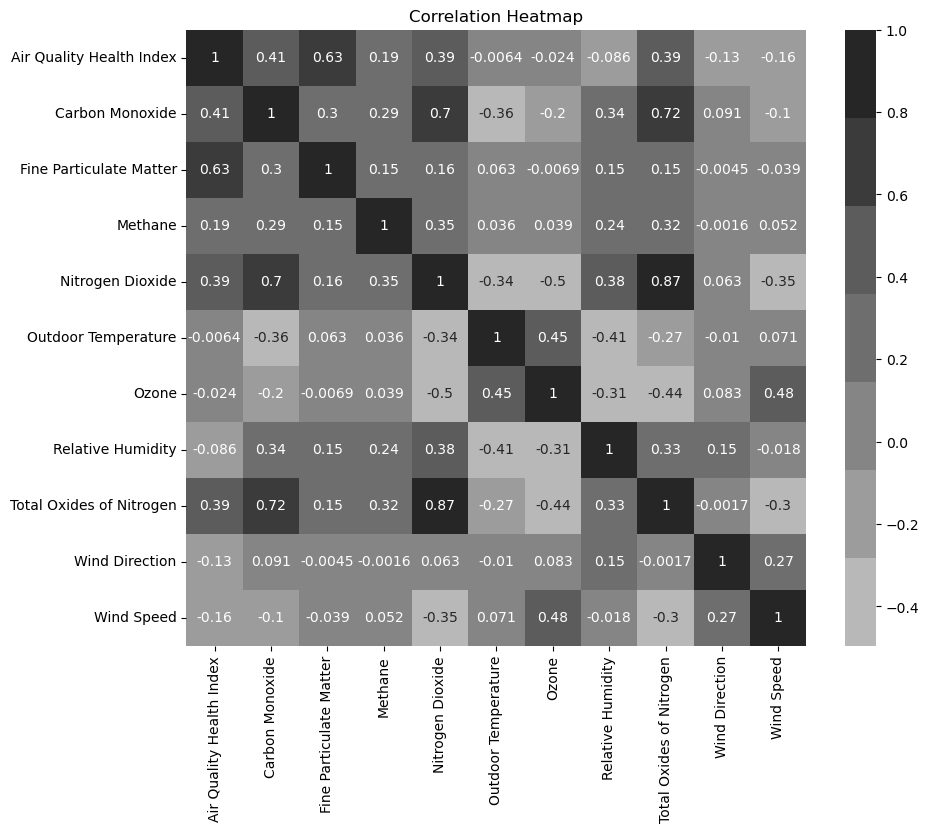

In [16]:
selected_vars = gases_df.drop(columns=['Nitric Oxide', 'Non-methane Hydrocarbons'])
cor_matrix = selected_vars.corr()
cmap_dict = {1: '#B8B8B8', 2: '#9C9C9C', 3: '#858585', 4: '#6E6E6E', 5: '#5C5C5C', 6: '#3B3B3B', 7: '#262626', 8: '#030303'}
cmap = ListedColormap([cmap_dict[i] for i in range(1, 8)])
plt.figure(figsize=(10, 8))
sns.heatmap(cor_matrix, cmap=cmap, annot=True)
plt.title('Correlation Heatmap')
plt.show()

##### Insight:
From the result, we can observe that Fine Particulate Matter is positively contributing the most to the air quality health index than any other parameter. Apart from Fine Particulate Matter, Carbon Monoxide, Methane, Nitrogen Dioxide and Total Oxides of Nitrogen are also positively contributing, but in small amounts. On the whole, these pollutants are found to be the reason behind the raise in the Air Quality Health Index.

### .V.2. How are the parameters varying across the seasons?
###### Approach: 
To answer this question, year, month, day and hours are extracted from the ReadingDate and the months are used to create a new column 'Season'. Only, the atmospheric characteristics, namely, Air Quality Health Index, Ozone, Outdoor Temperature, Relative Humidity, Wind Direction, and Wind Speed were compared across the seasons in each year. The characteristics were aggregated by mean to observe the trends for every season in each year.

In [17]:
dict_seasons = {1: 'Winter', 2: 'Winter', 3: 'Spring', 4: 'Spring', 5: 'Spring', 6: 'Summer', 7: 'Summer', 8: 'Summer', 9: 'Fall', 10: 'Fall', 11: 'Fall', 12: 'Winter'}
df['Season'] = df['Month'].apply(lambda x: dict_seasons.get(x))
df['Season'] = df['Season'].astype(str)
df.dtypes

ReadingDate                     datetime64[ns]
Year                                     int64
Month                                    int64
Day                                      int64
Hours                                    int64
Latitude                               float64
Longitude                              float64
Station Name                            object
Air Quality Health Index               float64
Carbon Monoxide                        float64
Fine Particulate Matter                float64
Hydrogen Sulphide                      float64
Inhalable Particulate Matter           float64
Methane                                float64
Nitric Oxide                           float64
Nitrogen Dioxide                       float64
Non-methane Hydrocarbons               float64
Outdoor Temperature                    float64
Ozone                                  float64
Relative Humidity                      float64
Sulphur Dioxide                        float64
Total Hydroca

In [18]:
df.head()

ReadingDate  Year  Month  Day  Hours   Latitude   Longitude  \
43364 2023-06-05 17:00:00  2023      6    5     17  51.082720 -114.138994   
43363 2023-06-05 17:00:00  2023      6    5     17  51.030789 -114.008836   
43362 2023-06-05 17:00:00  2023      6    5     17  50.955122 -113.969742   
43361 2023-06-05 16:00:00  2023      6    5     16  51.082720 -114.138994   
43360 2023-06-05 16:00:00  2023      6    5     16  51.030789 -114.008836   

                    Station Name  Air Quality Health Index  Carbon Monoxide  \
43364            Calgary Varsity                       5.0              NaN   
43363  Calgary Central Inglewood                       4.0              NaN   
43362          Calgary Southeast                       4.0              NaN   
43361            Calgary Varsity                       4.0             0.33   
43360  Calgary Central Inglewood                       4.0             0.20   

       ...  Non-methane Hydrocarbons  Outdoor Temperature  Ozone  \
43364  ...                       NaN                  NaN    NaN   
43363  ...                       NaN                  NaN    NaN   
43362  ...                       NaN                  NaN    NaN   
43361  ...                       NaN                 22.1  0.071   
43360  ...                       0.0                 21.9  0.062   

       Relative Humidity  Sulphur Dioxide  Total Hydrocarbons  \
43364                NaN              NaN                 NaN   
43363                NaN              NaN                 NaN   
43362                NaN              NaN                 NaN   
43361               37.2              NaN                 NaN   
43360               37.8              NaN                 2.1   

       Total Oxides of Nitrogen  Wind Direction  Wind Speed  Season  
43364                       NaN             NaN         NaN  Summer  
43363                       NaN             NaN         NaN  Summer  
43362                       NaN             NaN         NaN  Summer  
43361                     0.006            79.0         6.0  Summer  
43360                     0.004            98.0         6.1  Summer  

[5 rows x 26 columns]

The null values from all the atmospheric characteristics were removed below.

In [19]:
print(df['Ozone'].isnull().sum())
df = df.dropna(subset=['Ozone'])
print(df['Relative Humidity'].isnull().sum())
df = df.dropna(subset=['Relative Humidity'])
print(df['Outdoor Temperature'].isnull().sum())
df = df.dropna(subset=['Outdoor Temperature'])
print(df['Wind Direction'].isnull().sum())
df = df.dropna(subset=['Wind Direction'])
print(df['Wind Speed'].isnull().sum())
df = df.dropna(subset=['Wind Speed'])
print(len(df))
print(df.isna().sum())

91
13474
0
36
0
27005
ReadingDate                         0
Year                                0
Month                               0
Day                                 0
Hours                               0
Latitude                            0
Longitude                           0
Station Name                        0
Air Quality Health Index            0
Carbon Monoxide                     0
Fine Particulate Matter             0
Hydrogen Sulphide               27005
Inhalable Particulate Matter    15644
Methane                           630
Nitric Oxide                        0
Nitrogen Dioxide                    0
Non-methane Hydrocarbons          630
Outdoor Temperature                 0
Ozone                               0
Relative Humidity                   0
Sulphur Dioxide                 27005
Total Hydrocarbons                630
Total Oxides of Nitrogen            0
Wind Direction                      0
Wind Speed                          0
Season                      

In [20]:
new_df = df[['ReadingDate', 'Year', 'Month', 'Day', 'Hours', 'Season', 'Latitude', 'Longitude', 'Station Name', 'Air Quality Health Index', 'Ozone', 'Relative Humidity', 'Outdoor Temperature', 'Wind Direction', 'Wind Speed']]
new_df.head()

ReadingDate  Year  Month  Day  Hours  Season   Latitude  \
43361 2023-06-05 16:00:00  2023      6    5     16  Summer  51.082720   
43360 2023-06-05 16:00:00  2023      6    5     16  Summer  51.030789   
43357 2023-06-05 15:00:00  2023      6    5     15  Summer  51.030789   
43358 2023-06-05 15:00:00  2023      6    5     15  Summer  51.082720   
43355 2023-06-05 14:00:00  2023      6    5     14  Summer  51.082720   

        Longitude               Station Name  Air Quality Health Index  Ozone  \
43361 -114.138994            Calgary Varsity                       4.0  0.071   
43360 -114.008836  Calgary Central Inglewood                       4.0  0.062   
43357 -114.008836  Calgary Central Inglewood                       4.0  0.060   
43358 -114.138994            Calgary Varsity                       4.0  0.062   
43355 -114.138994            Calgary Varsity                       4.0  0.058   

       Relative Humidity  Outdoor Temperature  Wind Direction  Wind Speed  
43361               37.2                 22.1            79.0         6.0  
43360               37.8                 21.9            98.0         6.1  
43357               38.6                 21.4            57.0         5.2  
43358               39.6                 21.0            88.0         4.9  
43355               43.5                 19.4            30.0         5.7

The columns are aggregated below as discussed in the approach. This dataframe is used for statistical analysis, therefore it is not used in this file further.

In [21]:
max_values_per_season_station = new_df.groupby(['Year', 'Season', 'Station Name'])[['Air Quality Health Index', 'Ozone', 'Relative Humidity', 'Outdoor Temperature', 'Wind Direction', 'Wind Speed']].agg('mean')
max_values_per_season_station

Air Quality Health Index     Ozone  \
Year Season Station Name                                                    
2021 Fall   Calgary Central Inglewood                  2.591125  0.015006   
            Calgary Varsity                            2.183494  0.019201   
     Winter Calgary Central Inglewood                  3.100709  0.013986   
            Calgary Varsity                            2.596591  0.017553   
2022 Fall   Calgary Central Inglewood                  2.947886  0.019592   
            Calgary Varsity                            2.451980  0.022178   
     Spring Calgary Central Inglewood                  2.796829  0.031516   
            Calgary Varsity                            2.422050  0.032657   
     Summer Calgary Central Inglewood                  2.565796  0.030495   
            Calgary Varsity                            2.467545  0.032528   
     Winter Calgary Central Inglewood                  3.162475  0.018453   
            Calgary Varsity                            2.622736  0.022285   
2023 Spring Calgary Central Inglewood                  3.627767  0.029616   
            Calgary Varsity                            3.350168  0.033353   
     Summer Calgary Central Inglewood                  3.495050  0.043495   
            Calgary Varsity                            3.694444  0.049074   
     Winter Calgary Central Inglewood                  3.457034  0.013078   
            Calgary Varsity                            2.829771  0.019041   

                                       Relative Humidity  Outdoor Temperature  \
Year Season Station Name                                                        
2021 Fall   Calgary Central Inglewood          64.653487             3.076387   
            Calgary Varsity                    56.539984             2.974359   
     Winter Calgary Central Inglewood          79.769504           -12.208369   
            Calgary Varsity                    66.995739           -12.508807   
2022 Fall   Calgary Central Inglewood          60.448476             6.094346   
            Calgary Varsity                    51.510198             6.128218   
     Spring Calgary Central Inglewood          55.044797             4.524331   
            Calgary Varsity                    50.478096             4.111753   
     Summer Calgary Central Inglewood          63.503154            17.813356   
            Calgary Varsity                    56.319131            17.489263   
     Winter Calgary Central Inglewood          64.185161            -5.934256   
            Calgary Varsity                    55.428421            -6.220020   
2023 Spring Calgary Central Inglewood          55.144014             5.092857   
            Calgary Varsity                    49.200433             4.726118   
     Summer Calgary Central Inglewood          62.992079            16.417822   
            Calgary Varsity                    57.346296            15.876852   
     Winter Calgary Central Inglewood          59.675741            -3.603498   
            Calgary Varsity                    50.828244            -3.179237   

                                       Wind Direction  Wind Speed  
Year Season Station Name                                           
2021 Fall   Calgary Central Inglewood      211.524564    7.286846  
            Calgary Varsity                252.512019    7.125561  
     Winter Calgary Central Inglewood      201.360284    7.260851  
            Calgary Varsity                242.386364    6.699574  
2022 Fall   Calgary Central Inglewood      194.045231    6.980039  
            Calgary Varsity                228.409406    7.268515  
     Spring Calgary Central Inglewood      213.215560    9.812438  
            Calgary Varsity                228.250607    8.813113  
     Summer Calgary Central Inglewood      194.687531    7.868162  
            Calgary Varsity                207.837970    7.010688  
     Winter Calgary Central Inglewood      193.860161    8.18

The columns mentioned in the approach are aggregated by mean for observing the trends per season in each year. The values are rounded off to 2.

In [22]:
max_values_per_season = new_df.groupby(['Year', 'Season'])[['Air Quality Health Index', 'Ozone', 'Relative Humidity', 'Outdoor Temperature', 'Wind Direction', 'Wind Speed']].agg('mean')
max_values_per_season = max_values_per_season.reset_index()


max_values_per_season['Air Quality Health Index'] = max_values_per_season['Air Quality Health Index'].round(2)

max_values_per_season['Ozone'] = max_values_per_season['Ozone'].round(2)

max_values_per_season['Relative Humidity'] = max_values_per_season['Relative Humidity'].round(2)

max_values_per_season['Outdoor Temperature'] = max_values_per_season['Outdoor Temperature'].round(2)

max_values_per_season['Wind Direction'] = max_values_per_season['Wind Direction'].round(2)

max_values_per_season['Wind Speed'] = max_values_per_season['Wind Speed'].round(2)

max_values_per_season

Year  Season  Air Quality Health Index  Ozone  Relative Humidity  \
0  2021    Fall                      2.39   0.02              60.62   
1  2021  Winter                      2.85   0.02              73.39   
2  2022    Fall                      2.70   0.02              55.99   
3  2022  Spring                      2.61   0.03              52.74   
4  2022  Summer                      2.52   0.03              59.89   
5  2022  Winter                      2.89   0.02              59.81   
6  2023  Spring                      3.49   0.03              52.11   
7  2023  Summer                      3.60   0.05              60.07   
8  2023  Winter                      3.14   0.02              55.26   

   Outdoor Temperature  Wind Direction  Wind Speed  
0                 3.03          231.90        7.21  
1               -12.36          221.86        6.98  
2                 6.11          211.17        7.12  
3                 4.32          220.81        9.31  
4                17.65          201.29        7.44  
5                -6.08          211.18        7.73  
6                 4.91          178.09        6.84  
7                16.14          214.57        8.56  
8                -3.39          177.83        5.70

Season and year are concatenated for convenience.

In [23]:
max_values_per_season['Year'] = max_values_per_season['Year'].astype(str)
max_values_per_season['Season_Year'] = max_values_per_season[['Season', 'Year']].agg(' '.join, axis=1)

In [24]:
max_values_per_season = max_values_per_season[['Season_Year', 'Air Quality Health Index', 'Ozone', 'Relative Humidity', 'Outdoor Temperature', 'Wind Direction', 'Wind Speed']]
max_values_per_season

Season_Year  Air Quality Health Index  Ozone  Relative Humidity  \
0    Fall 2021                      2.39   0.02              60.62   
1  Winter 2021                      2.85   0.02              73.39   
2    Fall 2022                      2.70   0.02              55.99   
3  Spring 2022                      2.61   0.03              52.74   
4  Summer 2022                      2.52   0.03              59.89   
5  Winter 2022                      2.89   0.02              59.81   
6  Spring 2023                      3.49   0.03              52.11   
7  Summer 2023                      3.60   0.05              60.07   
8  Winter 2023                      3.14   0.02              55.26   

   Outdoor Temperature  Wind Direction  Wind Speed  
0                 3.03          231.90        7.21  
1               -12.36          221.86        6.98  
2                 6.11          211.17        7.12  
3                 4.32          220.81        9.31  
4                17.65          201.29        7.44  
5                -6.08          211.18        7.73  
6                 4.91          178.09        6.84  
7                16.14          214.57        8.56  
8                -3.39          177.83        5.70

In [25]:
fig = make_subplots(rows=6, cols=1, subplot_titles=("Air Quality Health Index", "Ozone", "Relative Humidity", "Outdoor Temperature", "Wind Direction", 'Wind Speed'))

fig.append_trace(go.Scatter(
    x=max_values_per_season['Season_Year'],
    y=max_values_per_season['Air Quality Health Index'], marker_color = '#030303'
), row=1, col=1)

fig.append_trace(go.Scatter(
    x=max_values_per_season['Season_Year'],
    y=max_values_per_season['Ozone'], marker_color = '#030303'
), row=2, col=1)

fig.append_trace(go.Scatter(
    x=max_values_per_season['Season_Year'],
    y=max_values_per_season['Relative Humidity'], marker_color = '#030303'
), row=3, col=1)

fig.append_trace(go.Scatter(
    x=max_values_per_season['Season_Year'],
    y=max_values_per_season['Outdoor Temperature'], marker_color = '#030303'
), row=4, col=1)

fig.append_trace(go.Scatter(
    x=max_values_per_season['Season_Year'],
    y=max_values_per_season['Wind Direction'], marker_color = '#030303'
), row=5, col=1)

fig.append_trace(go.Scatter(
    x=max_values_per_season['Season_Year'],
    y=max_values_per_season['Wind Speed'], marker_color = '#030303'
), row=6, col=1)


fig.update_layout(height=2000, width=600, title_text="Stacked Subplots", showlegend = False)
fig.show()

In [26]:
# new_df.to_csv('5var_air_quality.csv')

###### Insight:
Only the Air Quality Health Index has shown an upward trend while the rest show a downward trend from 2021 to 2023 while having fluctuations in between the years, except Ozone. This shows that Air Quality Health Index has increased from the year 2021. In Fall 2021, Ozone started with 0.02 ppm and ended with the same in Winter 2023 while fluctuating in between. This is an evidence that the ozone has neither increased nor decreased. For further analysis, a correlation plot was constructed in R file.

### .V.3. Trends of air quality health index in every station for each year

###### Approach:
To answer this question, the Air Quality Health Index was aggregated by average to find how it changes with Station for every year.

In [27]:
station_air_quality_per_year = df.groupby(['Year', 'Latitude', 'Longitude', 'Station Name'])['Air Quality Health Index'].agg('mean')
station_air_quality_per_year = station_air_quality_per_year.reset_index()
station_air_quality_per_year

Year   Latitude   Longitude               Station Name  \
0  2021  51.030789 -114.008836  Calgary Central Inglewood   
1  2021  51.082720 -114.138994            Calgary Varsity   
2  2022  51.030789 -114.008836  Calgary Central Inglewood   
3  2022  51.082720 -114.138994            Calgary Varsity   
4  2023  51.030789 -114.008836  Calgary Central Inglewood   
5  2023  51.082720 -114.138994            Calgary Varsity   

   Air Quality Health Index  
0                  2.773767  
1                  2.332480  
2                  2.866898  
3                  2.490143  
4                  3.557873  
5                  3.165856

In [29]:
px.bar(station_air_quality_per_year, x = "Year", y = "Air Quality Health Index", color = "Station Name", barmode = 'group', color_discrete_sequence=['black', 'grey'])


###### Insight:
The plot shows that the Air Quality Health Index has gradually increased from 2021 to 2023 in both the stations.

The dataframe below is created to observe which station between the two has the highest Air Quality Index. For this purpose, the Air Quality Health Index is aggregated by mean for each station.

In [30]:
station_air_quality = station_air_quality_per_year.groupby(['Latitude', 'Longitude','Station Name'])['Air Quality Health Index'].agg('mean')
station_air_quality = station_air_quality.reset_index()
station_air_quality

Latitude   Longitude               Station Name  Air Quality Health Index
0  51.030789 -114.008836  Calgary Central Inglewood                  3.066179
1  51.082720 -114.138994            Calgary Varsity                  2.662826

In [31]:
fig = px.scatter_mapbox(station_air_quality, lat="Latitude", lon="Longitude", hover_data=["Station Name", "Air Quality Health Index"],
                        zoom=10, mapbox_style="stamen-toner", size = 'Air Quality Health Index', color = 'Station Name',
                        range_color = [3, 7],
                        color_discrete_sequence=["red", "darkorange"],
                        title="Air Quality Health Index by Station")

fig.update_layout(
    mapbox=dict(center=dict(lat=51.04, lon=-114.1)),
    autosize=True,
    height=600,
    margin=dict(l=0, r=0, t=40, b=0),
    
)

fig.show()

###### Insight:
The highest Air Quality Health Index is observed to be in Central Inglewood. This indicates that the South East part of Calgary is more affected than the North West part.

### .V.4. Outdoor Temperature VS ’Feels like’ temperature
##### Approach:
The outdoor temperature provides a numerical value that represents the objective thermal condition of the environment. However, our perception of temperature and how it feels to us can differ from this objective measurement. This is mainly due to humidity present in the atmosphere. To find out how we feel, we need to know the heat index. The formula below is used to calculate the heat index:

Heat Index = -42.379 + 2.04901523T + 10.14333127R - 0.22475541TR - 6.83783 x 10-3T2 - 5.481717 x 10-2R2 + 1.22874 x 10-3T2R + 8.5282 x 10-4TR2 - 1.99 x 10-6T2R2

T - air temperature (F)
R - relative humidity (percentage)

The outdoor temperature is converted to Farenheit and substituted in the formula above. This results in heat index(body temperature) in Farenheit. This is again converted to Celcius. The results are compared with Relative Humidity and Outdoor Temperature to compare the trends and correlation among them.

In [185]:
print(df.columns)
print(df['Outdoor Temperature'].isnull().sum())
df = df.dropna(subset=['Outdoor Temperature'])
print(df['Relative Humidity'].isnull().sum())
heat_index_df = df[['Year', 'Month', 'Day', 'Hours', 'Outdoor Temperature', 'Relative Humidity']]
heat_index_df.head()

Index(['ReadingDate', 'Year', 'Month', 'Day', 'Hours', 'Latitude', 'Longitude',
       'Station Name', 'Air Quality Health Index', 'Carbon Monoxide',
       'Fine Particulate Matter', 'Hydrogen Sulphide',
       'Inhalable Particulate Matter', 'Methane', 'Nitric Oxide',
       'Nitrogen Dioxide', 'Non-methane Hydrocarbons', 'Outdoor Temperature',
       'Ozone', 'Relative Humidity', 'Sulphur Dioxide', 'Total Hydrocarbons',
       'Total Oxides of Nitrogen', 'Wind Direction', 'Wind Speed', 'Season'],
      dtype='object')
0
0


Year  Month  Day  Hours  Outdoor Temperature  Relative Humidity
43361  2023      6    5     16                 22.1               37.2
43360  2023      6    5     16                 21.9               37.8
43357  2023      6    5     15                 21.4               38.6
43358  2023      6    5     15                 21.0               39.6
43355  2023      6    5     14                 19.4               43.5

In [186]:
T = (heat_index_df['Outdoor Temperature'] * 9 / 5) + 32
RH = heat_index_df['Relative Humidity']
heat_index_df['Heat_Index'] = ((-42.379 + 2.04901523 * T + 10.14333127 * RH - 0.22475541 * T * RH - 6.83783 * 10**-3 * T ** 2 - 5.481717 * 10 ** -2 * RH ** 2 + 1.22874 * 10** -3 * T ** 2 * RH + 8.5282 * 10 ** -4 * T * RH ** 2 - 1.99 * 10 ** -6 * T ** 2 * RH ** 2) - 32) * 5 / 9
heat_index_df['Heat_Index'] = heat_index_df['Heat_Index'].round(1)
display(heat_index_df)

/var/folders/_h/d_8n_5kd6sx96_tp19kznnk00000gn/T/ipykernel_5071/3923251797.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/_h/d_8n_5kd6sx96_tp19kznnk00000gn/T/ipykernel_5071/3923251797.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Year  Month  Day  Hours  Outdoor Temperature  Relative Humidity  \
43361  2023      6    5     16                 22.1               37.2   
43360  2023      6    5     16                 21.9               37.8   
43357  2023      6    5     15                 21.4               38.6   
43358  2023      6    5     15                 21.0               39.6   
43355  2023      6    5     14                 19.4               43.5   
...     ...    ...  ...    ...                  ...                ...   
1389   2021     10    6      3                 10.0               38.4   
1386   2021     10    6      2                 11.8               31.5   
1385   2021     10    6      2                  8.6               52.3   
1383   2021     10    6      1                 14.0               25.7   
1382   2021     10    6      1                 12.7               33.3   

       Heat_Index  
43361        24.9  
43360        24.9  
43357        24.9  
43358        25.0  
43355        25.5  
...           ...  
1389         34.2  
1386         29.3  
1385         40.7  
1383         25.4  
1382         29.0  

[27005 rows x 7 columns]

The data is aggregated by mean for every year, month, and day. Only May 2023 data was considered to be plotted to see the recent trends in the weather conditions.

In [187]:
heat_month = heat_index_df.groupby(['Year', 'Month', 'Day'])['Outdoor Temperature', 'Relative Humidity', 'Heat_Index'].agg('max')

heat_month = heat_month.reset_index()

heat_month = heat_month[heat_month['Year'] == 2023]

heat_month = heat_month[heat_month['Month'] == 5]

heat_month

/var/folders/_h/d_8n_5kd6sx96_tp19kznnk00000gn/T/ipykernel_5071/354228689.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



Year  Month  Day  Outdoor Temperature  Relative Humidity  Heat_Index
572  2023      5    1                 25.1               71.4        49.4
573  2023      5    2                 24.7               63.2        43.4
574  2023      5    3                 26.4               70.9        44.6
575  2023      5    4                 26.5               53.5        37.0
576  2023      5    5                 22.4               59.9        43.6
577  2023      5    6                 10.9               99.7        51.2
578  2023      5    7                 16.9               99.8        42.9
579  2023      5    8                 12.3               99.9        39.3
580  2023      5    9                 14.4               99.9        42.9
581  2023      5   10                 13.9               99.9        38.1
582  2023      5   11                 18.7               99.7        49.0
583  2023      5   12                 20.7               99.5        48.8
584  2023      5   13                 22.7               87.3        47.3
585  2023      5   14                 21.5               82.0        37.5
586  2023      5   15                 26.5               99.9        30.7
587  2023      5   16                 19.9               77.3        30.7
588  2023      5   17                 18.6               99.7        36.9
589  2023      5   18                 20.0               99.8        58.1
590  2023      5   19                 29.6               74.4        47.2
591  2023      5   20                 26.9               65.7        33.7
592  2023      5   21                 27.2               92.1        33.3
593  2023      5   22                 22.0               99.8        31.9
594  2023      5   23                 21.3               99.8        37.2
595  2023      5   24                 19.0               99.9        39.2
596  2023      5   25                 16.8               66.2        35.1
597  2023      5   26                 20.9               99.8        41.2
598  2023      5   27                 22.5               99.6        41.1
599  2023      5   28                 25.1               99.6        38.3
600  2023      5   29                 24.9               86.5        32.3
601  2023      5   30                 25.5               66.4        35.6
602  2023      5   31                 23.5               99.0        32.5

In [188]:
heat_month = heat_month.reset_index()

heat_month['Outdoor Temperature'] = heat_month['Outdoor Temperature'].round(2)

heat_month['Relative Humidity'] = heat_month['Relative Humidity'].round(2)

heat_month['Heat_Index'] = heat_month['Heat_Index'].round(2)

heat_month

index  Year  Month  Day  Outdoor Temperature  Relative Humidity  \
0     572  2023      5    1                 25.1               71.4   
1     573  2023      5    2                 24.7               63.2   
2     574  2023      5    3                 26.4               70.9   
3     575  2023      5    4                 26.5               53.5   
4     576  2023      5    5                 22.4               59.9   
5     577  2023      5    6                 10.9               99.7   
6     578  2023      5    7                 16.9               99.8   
7     579  2023      5    8                 12.3               99.9   
8     580  2023      5    9                 14.4               99.9   
9     581  2023      5   10                 13.9               99.9   
10    582  2023      5   11                 18.7               99.7   
11    583  2023      5   12                 20.7               99.5   
12    584  2023      5   13                 22.7               87.3   
13    585  2023      5   14                 21.5               82.0   
14    586  2023      5   15                 26.5               99.9   
15    587  2023      5   16                 19.9               77.3   
16    588  2023      5   17                 18.6               99.7   
17    589  2023      5   18                 20.0               99.8   
18    590  2023      5   19                 29.6               74.4   
19    591  2023      5   20                 26.9               65.7   
20    592  2023      5   21                 27.2               92.1   
21    593  2023      5   22                 22.0               99.8   
22    594  2023      5   23                 21.3               99.8   
23    595  2023      5   24                 19.0               99.9   
24    596  2023      5   25                 16.8               66.2   
25    597  2023      5   26                 20.9               99.8   
26    598  2023      5   27                 22.5               99.6   
27    599  2023      5   28                 25.1               99.6   
28    600  2023      5   29                 24.9               86.5   
29    601  2023      5   30                 25.5               66.4   
30    602  2023      5   31                 23.5               99.0   

    Heat_Index  
0         49.4  
1         43.4  
2         44.6  
3         37.0  
4         43.6  
5         51.2  
6         42.9  
7         39.3  
8         42.9  
9         38.1  
10        49.0  
11        48.8  
12        47.3  
13        37.5  
14        30.7  
15        30.7  
16        36.9  
17        58.1  
18        47.2  
19        33.7  
20        33.3  
21        31.9  
22        37.2  
23        39.2  
24        35.1  
25        41.2  
26        41.1  
27        38.3  
28        32.3  
29        35.6  
30        32.5

In [189]:
px.line(
    data_frame = heat_month,
    
    x = "Day",
    
    y = ["Outdoor Temperature", "Relative Humidity", "Heat_Index"],
    
    orientation = "v",
    
    markers = True,
    
    title='Heat-Index based on humidity and mean temperature',
    
    color_discrete_sequence=["black", "#8B7D6B", "#B8B8B8"]
    
).update_layout(yaxis_title = 'Temperature in celsius', legend_title_text = 'Variables', )

In [190]:
# heat_month.to_csv('heat_month.csv')

###### Insight:
The Heat Index and the Relative Humidity look like they have a positive correlation, but let's check by doing some statistical analysis in R.

### .V.5. What are the trends in the outdoor temperature and predict the temperature of the coming 15 days?
###### Approach:
This guiding question is solved in four parts:
1. Finding the trends in the outdoor temperature by aggregating the hourly data for the year 2022 as the data for other years are incomplete.
2. Observing the daily trends in the outdoor temperature in all the seasons by aggregating the data for the year 2022.
3. Observing the hourly trends in the outdoor temperature in all the seasons by aggregating the data for the year 2022.

In [49]:
temp_day = heat_index_df.groupby(['Year', 'Month', 'Day', 'Hours'])['Outdoor Temperature'].agg('mean')
temp_day = temp_day.reset_index()
temp_day

Year  Month  Day  Hours  Outdoor Temperature
0      2021     10    6      1                13.35
1      2021     10    6      2                10.20
2      2021     10    6      3                 8.05
3      2021     10    6      4                 6.70
4      2021     10    6      5                 5.90
...     ...    ...  ...    ...                  ...
13885  2023      6    5     12                17.45
13886  2023      6    5     13                18.60
13887  2023      6    5     14                19.70
13888  2023      6    5     15                21.20
13889  2023      6    5     16                22.00

[13890 rows x 5 columns]

In [113]:
temp_year_month = temp_day[temp_day['Year'] == 2022]
# temp_year_month = temp_year_month.groupby(['Year', 'Month'])['Outdoor Temperature'].agg('mean')
# temp_year_month = temp_year_month.reset_index()
display(temp_year_month)
avg_month = sum(temp_year_month['Outdoor Temperature']) // len(temp_year_month)

Year  Month  Day  Hours  Outdoor Temperature
2000   2022      1    1      1               -26.00
2001   2022      1    1      2               -25.95
2002   2022      1    1      3               -25.05
2003   2022      1    1      4               -24.05
2004   2022      1    1      5               -23.85
...     ...    ...  ...    ...                  ...
10312  2022     12   31     19                -4.00
10313  2022     12   31     20                -4.00
10314  2022     12   31     21                -4.15
10315  2022     12   31     22                -4.40
10316  2022     12   31     23                 0.00

[8317 rows x 5 columns]

#### A YEAR IN CALGARY

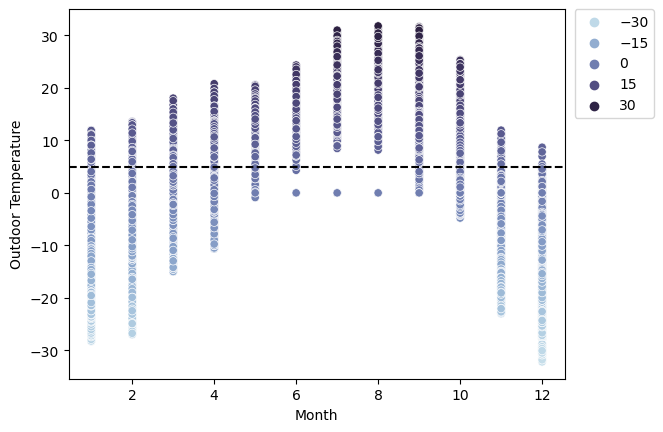

In [119]:
sns.scatterplot(data=temp_year_month, x="Month", y="Outdoor Temperature", hue="Outdoor Temperature", palette = "ch:s=.25,rot=-.25")
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.axhline(avg_month, color='black', linestyle='--')
plt.show()

The highest range of values are observed in winter and the lowest are observed in May and June. Temperatures above 0 can only be observed during summers in Calgary. Now, let's look at the daily averages of outdoor temperature in different seasons.

#### A MONTH IN CALGARY
##### Winter Season

In [123]:
temp_year_month_day = temp_day[temp_day['Year'] == 2022]
temp_year_month_dayw = temp_year_month_day[(temp_year_month_day['Month'] == 1) | (temp_year_month_day['Month'] == 2) | (temp_year_month_day['Month'] == 12)]
temp_year_month_daysp = temp_year_month_day[(temp_year_month_day['Month'] == 3) | (temp_year_month_day['Month'] == 4) | (temp_year_month_day['Month'] == 5)]
temp_year_month_days = temp_year_month_day[(temp_year_month_day['Month'] == 6) | (temp_year_month_day['Month'] == 7) | (temp_year_month_day['Month'] == 8)]
temp_year_month_dayf = temp_year_month_day[(temp_year_month_day['Month'] == 9) | (temp_year_month_day['Month'] == 10) | (temp_year_month_day['Month'] == 11)]
avg_day_w = sum(temp_year_month_dayw['Outdoor Temperature']) // len(temp_year_month_dayw)
avg_day_sp = sum(temp_year_month_daysp['Outdoor Temperature']) // len(temp_year_month_daysp)
avg_day_s = sum(temp_year_month_days['Outdoor Temperature']) // len(temp_year_month_days)
avg_day_f = sum(temp_year_month_dayf['Outdoor Temperature']) // len(temp_year_month_dayf)
temp_year_month_dayw

Year  Month  Day  Hours  Outdoor Temperature
2000   2022      1    1      1               -26.00
2001   2022      1    1      2               -25.95
2002   2022      1    1      3               -25.05
2003   2022      1    1      4               -24.05
2004   2022      1    1      5               -23.85
...     ...    ...  ...    ...                  ...
10312  2022     12   31     19                -4.00
10313  2022     12   31     20                -4.00
10314  2022     12   31     21                -4.15
10315  2022     12   31     22                -4.40
10316  2022     12   31     23                 0.00

[2053 rows x 5 columns]

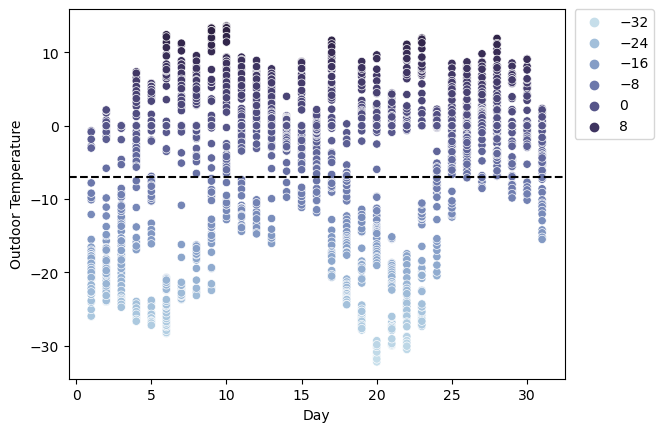

In [124]:
sns.scatterplot(data=temp_year_month_dayw, x="Day", y="Outdoor Temperature", hue="Outdoor Temperature", palette = "ch:s=.25,rot=-.25")
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.axhline(avg_day_w, color='black', linestyle='--')
plt.show()

##### Spring Season

In [82]:
temp_year_month_daysp

Year  Month  Day  Hours  Outdoor Temperature
3343  2022      3    1      1                -4.40
3344  2022      3    1      2                -4.25
3345  2022      3    1      3                -4.90
3346  2022      3    1      4                -5.25
3347  2022      3    1      5                -5.50
...    ...    ...  ...    ...                  ...
5443  2022      5   31     19                16.20
5444  2022      5   31     20                16.15
5445  2022      5   31     21                15.40
5446  2022      5   31     22                14.70
5447  2022      5   31     23                14.05

[2105 rows x 5 columns]

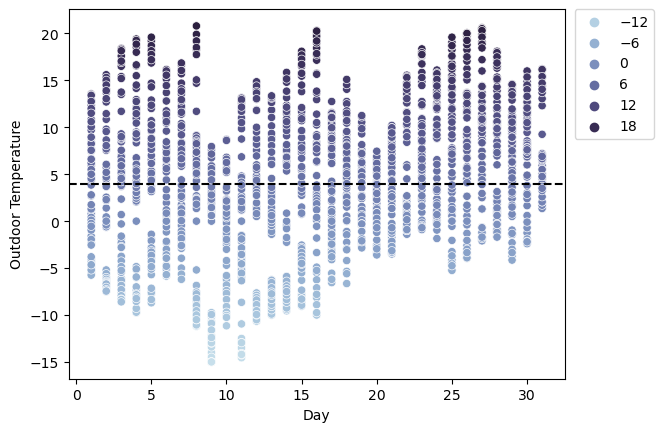

In [125]:
sns.scatterplot(data=temp_year_month_daysp, x="Day", y="Outdoor Temperature", hue="Outdoor Temperature", palette = "ch:s=.25,rot=-.25")
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.axhline(avg_day_sp, color='black', linestyle='--')
plt.show()

##### Summer Season

In [83]:
temp_year_month_days

Year  Month  Day  Hours  Outdoor Temperature
5448  2022      6    1      1                12.70
5449  2022      6    1      2                11.40
5450  2022      6    1      3                10.65
5451  2022      6    1      4                10.10
5452  2022      6    1      5                10.50
...    ...    ...  ...    ...                  ...
7536  2022      8   31     19                30.45
7537  2022      8   31     20                29.80
7538  2022      8   31     21                25.25
7539  2022      8   31     22                22.95
7540  2022      8   31     23                23.45

[2093 rows x 5 columns]

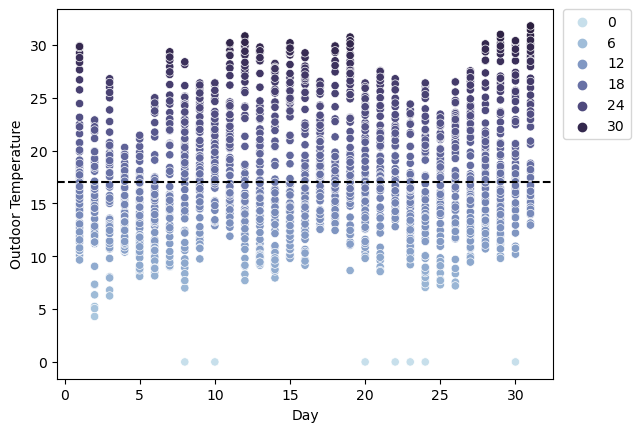

In [126]:
sns.scatterplot(data=temp_year_month_days, x="Day", y="Outdoor Temperature", hue="Outdoor Temperature", palette = "ch:s=.25,rot=-.25")
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.axhline(avg_day_s, color='black', linestyle='--')
plt.show()

##### Fall Season

In [84]:
temp_year_month_dayf

Year  Month  Day  Hours  Outdoor Temperature
7541  2022      9    1      1                19.90
7542  2022      9    1      2                18.50
7543  2022      9    1      3                17.70
7544  2022      9    1      4                16.80
7545  2022      9    1      5                16.25
...    ...    ...  ...    ...                  ...
9602  2022     11   30     19               -17.95
9603  2022     11   30     20               -18.50
9604  2022     11   30     21               -18.95
9605  2022     11   30     22               -19.05
9606  2022     11   30     23                 0.00

[2066 rows x 5 columns]

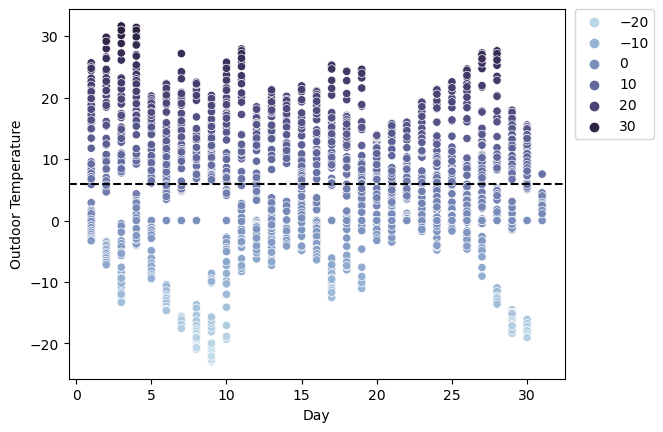

In [127]:
sns.scatterplot(data=temp_year_month_dayf, x="Day", y="Outdoor Temperature", hue="Outdoor Temperature", palette = "ch:s=.25,rot=-.25")
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.axhline(avg_day_f, color='black', linestyle='--')
plt.show()

###### Insight:
Calgary experiences extremely cold temperature in winter with an average of -7° celcius. In spring, the average moved up to 4° celcius with the lowest being -15° and the highest being 20° celcius. The highest temperatures might have been observed while moving towards spring. In summer, the lowest is 4°C, aside from few exceptional days which have 0°C. The average in Summer is observed to be 17°C with the highest temperature being above 30°C. The temperatures drop upto -20°C in Fall but the highest still remains above 30°C. This can be interpreted as: the lowest temperatures are likely to be observed at the start of winter and the highest might be during the end of Summer. Since the lowest is on the 9th, we can think of it as a possibility for the winter to have started soon in 2022. Now, let's look at the hourly trends in the temperatures during all the seasons.

#### A DAY IN CALGARY
##### Winter Season

In [106]:
temp_year_month_day_hoursw = temp_year_month_dayw.groupby(['Year', 'Hours'])['Outdoor Temperature'].agg('mean')
temp_year_month_day_hoursw = temp_year_month_day_hoursw.reset_index()
temp_year_month_day_hoursw

Year  Hours  Outdoor Temperature
0   2022      1            -7.888333
1   2022      2            -8.009444
2   2022      3            -8.240556
3   2022      4            -8.635057
4   2022      5            -5.476471
5   2022      6            -8.957955
6   2022      7            -8.898333
7   2022      8            -8.921111
8   2022      9            -8.823034
9   2022     10            -8.022222
10  2022     11            -3.907222
11  2022     12            -5.634270
12  2022     13            -4.624719
13  2022     14            -3.644944
14  2022     15            -3.261932
15  2022     16            -3.568539
16  2022     17            -1.813889
17  2022     18            -5.190000
18  2022     19            -5.843333
19  2022     20            -6.466667
20  2022     21            -6.913333
21  2022     22            -7.061111
22  2022     23            -3.932222

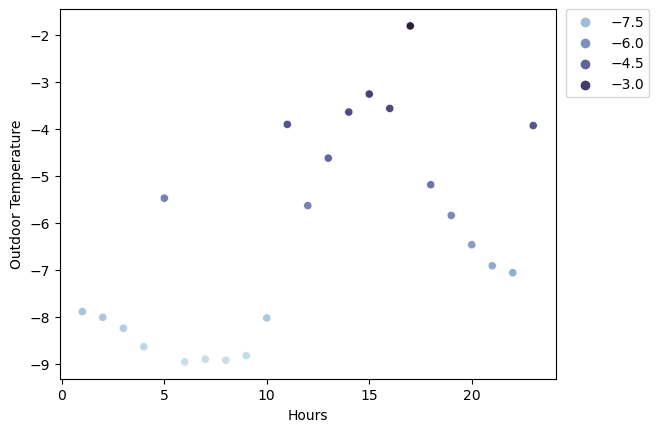

In [107]:
sns.scatterplot(data=temp_year_month_day_hoursw, x="Hours", y="Outdoor Temperature", hue="Outdoor Temperature", palette = "ch:s=.25,rot=-.25")
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

##### Spring Season

In [99]:
temp_year_month_day_hourssp = temp_year_month_daysp.groupby(['Year', 'Hours'])['Outdoor Temperature'].agg('mean')
temp_year_month_day_hourssp = temp_year_month_day_hourssp.reset_index()
temp_year_month_day_hourssp

Year  Hours  Outdoor Temperature
0   2022      1             2.395652
1   2022      2             1.895055
2   2022      3             1.335326
3   2022      4             0.705978
4   2022      5            -0.012644
5   2022      6            -0.230899
6   2022      7            -0.232222
7   2022      8             0.377174
8   2022      9             1.460870
9   2022     10             3.123913
10  2022     11             4.534239
11  2022     12             5.752174
12  2022     13             6.833696
13  2022     14             7.518478
14  2022     15             7.855435
15  2022     16             8.186413
16  2022     17             8.357609
17  2022     18             8.211957
18  2022     19             7.874457
19  2022     20             7.121739
20  2022     21             6.067391
21  2022     22             5.094565
22  2022     23             4.102717

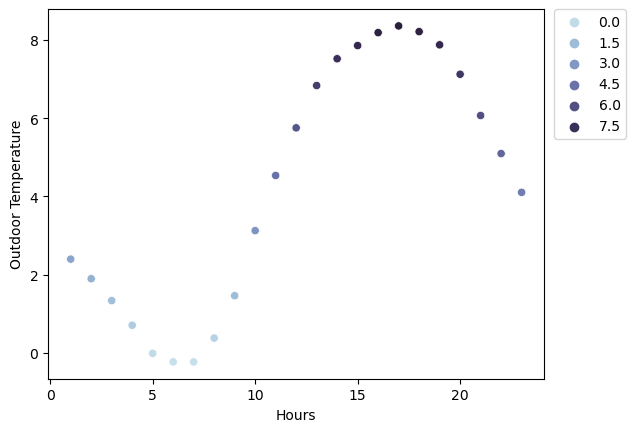

In [100]:
sns.scatterplot(data=temp_year_month_day_hourssp, x="Hours", y="Outdoor Temperature", hue="Outdoor Temperature", palette = "ch:s=.25,rot=-.25")
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

##### Summer Season

In [101]:
temp_year_month_day_hourss = temp_year_month_days.groupby(['Year', 'Hours'])['Outdoor Temperature'].agg('mean')
temp_year_month_day_hourss = temp_year_month_day_hourss.reset_index()
temp_year_month_day_hourss

Year  Hours  Outdoor Temperature
0   2022      1            15.205435
1   2022      2            14.523370
2   2022      3            13.696196
3   2022      4            12.539130
4   2022      5            12.544767
5   2022      6            12.287059
6   2022      7            12.394444
7   2022      8            13.482065
8   2022      9            15.086957
9   2022     10            16.860326
10  2022     11            18.487363
11  2022     12            19.759341
12  2022     13            20.839560
13  2022     14            21.557143
14  2022     15            21.956593
15  2022     16            21.958791
16  2022     17            22.186264
17  2022     18            22.201648
18  2022     19            21.758696
19  2022     20            21.183152
20  2022     21            20.072826
21  2022     22            18.697826
22  2022     23            17.321739

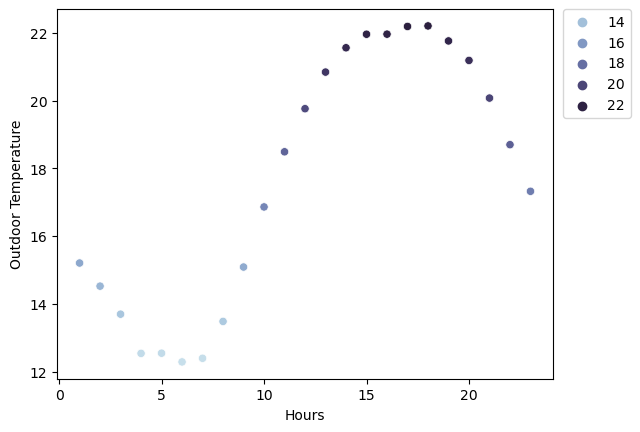

In [102]:
sns.scatterplot(data=temp_year_month_day_hourss, x="Hours", y="Outdoor Temperature", hue="Outdoor Temperature", palette = "ch:s=.25,rot=-.25")
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

##### Fall Season

In [103]:
temp_year_month_day_hoursf = temp_year_month_dayf.groupby(['Year', 'Hours'])['Outdoor Temperature'].agg('mean')
temp_year_month_day_hoursf = temp_year_month_day_hoursf.reset_index()
temp_year_month_day_hoursf

Year  Hours  Outdoor Temperature
0   2022      1             4.335714
1   2022      2             3.789560
2   2022      3             3.303846
3   2022      4             3.061667
4   2022      5             3.200000
5   2022      6             1.918539
6   2022      7             2.456593
7   2022      8             2.311538
8   2022      9             2.984066
9   2022     10             4.604945
10  2022     11             6.621978
11  2022     12             5.687912
12  2022     13             9.406742
13  2022     14            10.359551
14  2022     15            10.986517
15  2022     16            11.168539
16  2022     17            11.370787
17  2022     18             7.851685
18  2022     19             9.567416
19  2022     20             8.171910
20  2022     21             6.808989
21  2022     22             5.847753
22  2022     23             5.787778

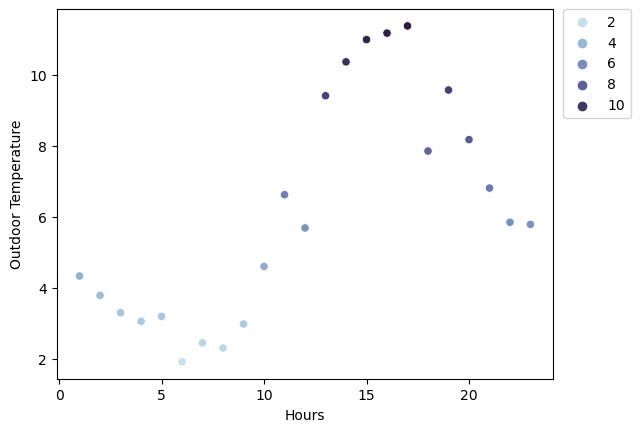

In [105]:
sns.scatterplot(data=temp_year_month_day_hoursf, x="Hours", y="Outdoor Temperature", hue="Outdoor Temperature", palette = "ch:s=.25,rot=-.25")
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

###### Insight:
In every season, the temperatures are observed to drop in the early mornings(12AM - 6AM), raise gradually during the morning - evening period(7AM - 5PM) and drop eventually again in the late evenings(6PM - 11PM).

#### Predicting the temperature for the last 15 days of June 2023 (16 - 31st)
Since the future characteristics prediction is not available, the last year's summer data was considered to predict the outdoor temperature. To answer this question, the columns were aggregated based on year, month, and day for summer season of the year 2022.

In [159]:
gases_df = df
gases_df = gases_df.dropna(subset=['Methane'])
# print(gases_df.isna().sum())
gases_df = gases_df[gases_df['Year'] == 2022]
gases_df = gases_df[(gases_df['Month'] == 6) | (gases_df['Month'] == 7) | (gases_df['Month'] == 8)]
gases_df = gases_df[['Year', 'Month', 'Day', 'Air Quality Health Index', 'Carbon Monoxide', 'Fine Particulate Matter', 'Methane', 'Nitric Oxide', 'Nitrogen Dioxide', 'Non-methane Hydrocarbons', 'Outdoor Temperature', 'Ozone', 'Relative Humidity', 'Total Oxides of Nitrogen', 'Wind Direction', 'Wind Speed']]
gases_df.to_csv('june2022.csv')
june = pd.read_csv('june2022.csv')
june

Unnamed: 0  Year  Month  Day  Air Quality Health Index  Carbon Monoxide  \
0          24150  2022      8   31                       3.0             0.07   
1          24149  2022      8   31                       3.0             0.37   
2          24146  2022      8   31                       3.0             0.19   
3          24147  2022      8   31                       3.0             0.16   
4          24143  2022      8   31                       3.0             0.14   
...          ...   ...    ...  ...                       ...              ...   
4073       17810  2022      6    1                       3.0             0.15   
4074       17808  2022      6    1                       3.0             0.12   
4075       17807  2022      6    1                       3.0             0.16   
4076       17805  2022      6    1                       3.0             0.14   
4077       17804  2022      6    1                       3.0             0.16   

      Fine Particulate Matter  Methane  Nitric Oxide  Nitrogen Dioxide  \
0                         8.0      0.0         0.000             0.004   
1                        13.8      2.0         0.004             0.027   
2                        11.6      2.1         0.001             0.017   
3                         8.1      0.0         0.000             0.011   
4                         7.6      2.1         0.000             0.011   
...                       ...      ...           ...               ...   
4073                      6.1      2.0         0.000             0.008   
4074                      5.7      0.0         0.000             0.007   
4075                      6.6      2.0         0.000             0.008   
4076                      5.7      0.0         0.000             0.009   
4077                      6.4      2.0         0.000             0.009   

      Non-methane Hydrocarbons  Outdoor Temperature  Ozone  Relative Humidity  \
0                          0.0                 23.5  0.033               32.1   
1                          0.0                 23.4  0.014               33.9   
2                          0.0                 22.4  0.019               46.3   
3                          0.0                 23.5  0.025               34.8   
4                          0.0                 24.7  0.029               38.8   
...                        ...                  ...    ...                ...   
4073                       0.0                 10.4  0.036               33.9   
4074                       0.0                 11.7  0.041               28.3   
4075                       0.0                 11.1  0.035               33.3   
4076                       0.0                 12.8  0.038               27.7   
4077                       0.0                 12.6  0.037               29.3   

      Total Oxides of Nitrogen  Wind Direction  Wind Speed  
0                        0.003           323.0         6.1  
1                        0.031           274.0         3.5  
2                        0.018           269.0         1.9  
3                        0.011           340.0         3.8  
4                        0.011             0.0         0.0  
...                        ...             ...         ...  
4073                     0.008            87.0         5.8  
4074                     0.007            77.0         5.2  
4075                     0.008            78.0         8.0  
4076                     0.009            75.0         6.4  
4077                     0.009            82.0         7.1  

[4078 rows x 17 columns]

In [160]:
group = june.groupby(['Year', 'Day'])['Air Quality Health Index', 'Carbon Monoxide', 'Fine Particulate Matter', 'Methane', 'Nitric Oxide', 'Nitrogen Dioxide', 'Non-methane Hydrocarbons', 'Outdoor Temperature', 'Ozone', 'Relative Humidity', 'Total Oxides of Nitrogen', 'Wind Direction', 'Wind Speed'].agg('max')

/var/folders/_h/d_8n_5kd6sx96_tp19kznnk00000gn/T/ipykernel_5071/1575601710.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



In [161]:
group = group.reset_index()
group

Year  Day  Air Quality Health Index  Carbon Monoxide  \
0   2022    1                       4.0             0.38   
1   2022    2                       4.0             0.51   
2   2022    3                       4.0             0.29   
3   2022    4                       3.0             0.24   
4   2022    5                       3.0             0.20   
5   2022    6                       3.0             0.29   
6   2022    7                       4.0             0.25   
7   2022    8                       4.0             0.42   
8   2022    9                       3.0             0.34   
9   2022   10                       4.0             0.26   
10  2022   11                       3.0             0.25   
11  2022   12                       4.0             0.32   
12  2022   13                       4.0             0.25   
13  2022   14                       4.0             0.47   
14  2022   15                       4.0             1.25   
15  2022   16                       4.0             0.33   
16  2022   17                       3.0             0.32   
17  2022   18                       4.0             0.37   
18  2022   19                       4.0             0.49   
19  2022   20                       4.0             0.25   
20  2022   21                       4.0             0.35   
21  2022   22                       5.0             0.32   
22  2022   23                       3.0             0.28   
23  2022   24                       4.0             0.25   
24  2022   25                       3.0             0.35   
25  2022   26                       4.0             0.46   
26  2022   27                       4.0             0.40   
27  2022   28                       3.0             0.29   
28  2022   29                       4.0             0.30   
29  2022   30                       3.0             0.28   
30  2022   31                       4.0             0.53   

    Fine Particulate Matter  Methane  Nitric Oxide  Nitrogen Dioxide  \
0                      36.0      2.6         0.016             0.032   
1                      27.7      2.4         0.038             0.031   
2                      16.8      2.5         0.009             0.028   
3                      23.1      2.4         0.010             0.017   
4                      12.4      2.1         0.012             0.017   
5                      16.1      2.3         0.017             0.019   
6                      39.4      2.4         0.009             0.020   
7                      20.3      2.3         0.025             0.026   
8                      13.0      2.1         0.011             0.021   
9                      40.1      2.3         0.023             0.023   
10                     22.6      2.4         0.026             0.026   
11                     17.8      2.4         0.044             0.023   
12                     10.2      2.2         0.026             0.020   
13                     12.4      2.3         0.011             0.030   
14                     17.9      2.3         0.010             0.023   
15                     24.0      2.5         0.037             0.027   
16                     14.2      2.2         0.009             0.019   
17                     22.2      2.6         0.034             0.024   
18                     25.2      2.8         0.021             0.030   
19                     20.6      2.6         0.017             0.019   
20                     22.5      2.3         0.020             0.018   
21                     25.2      2.9         0.025             0.020   
22                     13.0      2.2         0.016             0.020   
23                     18.9      2.2         0.013             0.018   
24                     17.2      2.5         0.024             0.020   
25                     34.2      2.7         0.035             0.019   
26                     18.8      2.7         0.017             0.023   
27                     18.2      2.5         0.021             0.01

In [162]:
group.to_csv('june2022.csv') # This file is used for statistical analysis in R.

After predicting the temperatures for the last 15 days in R, they were plotted to see the behaviour of the outdoor temperature.

In [4]:
pt = pd.read_csv('predicted_temp.csv')

In [5]:
pt

temp  index
0   17.184711     16
1   10.694030     17
2   14.742261     18
3   10.207467     19
4   11.899332     20
5   12.655574     21
6   14.675988     22
7    9.521023     23
8    5.090234     24
9   14.283516     25
10  16.845124     26
11  11.072469     27
12  12.004938     28
13  16.955132     29
14  15.613314     30
15   8.853608     31

In [6]:
fig = px.line(pt, x = 'index', y = 'temp', color_discrete_sequence=['black'])
fig.update_layout(xaxis_title = 'Day', yaxis_title = 'Outdoor Temperature', title = 'Temperature for the next 15 days in Calgary')

Mostly, the temperatures might be above 10°C for almost all the days, and there might probably be a drop on 24th according to the predictions. Since it is summer in Calgary, the temperatures might not go below 0°C in June.

## Key Takeaways

1. The Air Quality Health Index is influenced by various pollutants and environmental factors, which can have both positive and negative effects on its behavior.

2. Over the years from 2021 to 2023, there has been a noticeable upward trend in the Air Quality Index, indicating a worsening air quality. However, the limited availability of pollutant data has resulted in a lack of comprehensive information for multiple seasons in the visualization.

3. The data for the South East station is predominantly missing, which reduces the effectiveness of the geospatial map. Including more locations would have provided a better representation of the overall air quality situation.

4. Central Inglewood is identified as the station with the highest Air Quality Health Index in Calgary. Identifying Central Inglewood as the station with the highest AQHI implies that the air quality at that particular location may have higher concentrations of pollutants or environmental characteristics that contribute to a higher index value. It serves as an indicator for individuals in that area to be more cautious and take necessary measures to protect their health, such as limiting outdoor activities, using air filtration systems, or following local health advisories.

5. There appears to be a negative correlation between the Air Quality Health Index and outdoor temperature. While it is not directly implied that increased Air Quality Index causes a decrease in outdoor temperature, there may be other contributing factors involved.

6. It should be noted that the predictions based on the average outdoor temperature of the previous year (2022) during summer might not be entirely accurate as predicting future temperatures requires comprehensive climate models and up-to-date data on various factors, such as greenhouse gas emissions, atmospheric conditions, and natural climate variability.

## References

- The dataset was collected from https://data.calgary.ca/Environment/Air-Quality-Data-near-real-time-/g9s5-qhu5.
- Stack overflow - https://stackoverflow.com/